In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
–ú–µ—Ç–æ–¥ k –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç –Ω–æ–≤–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –¥–æ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏ –∏, –æ—Ç–±–∏—Ä–∞—è k –±–ª–∏–∂–∞–π—à–∏—Ö, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è (–≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏) –∏–ª–∏ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è (–≤ —Å–ª—É—á–∞–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏). \
–ü—Ä–∏ —ç—Ç–æ–º —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –º–æ–∂–Ω–æ –ø–æ-—Ä–∞–∑–Ω–æ–º—É –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä –º–æ–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å —Å–ø–æ—Å–æ–± –ø–æ–¥—Å—á–µ—Ç–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –∏–ª–∏ —Å–ø–æ—Å–æ–± –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏—è —Å–æ—Å–µ–¥–µ–π –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é. \
–î–ª—è –Ω–∞—á–∞–ª–∞ —Å–∫–∞—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ.

In [79]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

X      Y  class
0  0.70 -0.247    0.0
1 -3.95  2.740    1.0
2  0.15 -2.160    1.0
3 -1.67 -0.942    1.0
4  2.56 -1.850    1.0

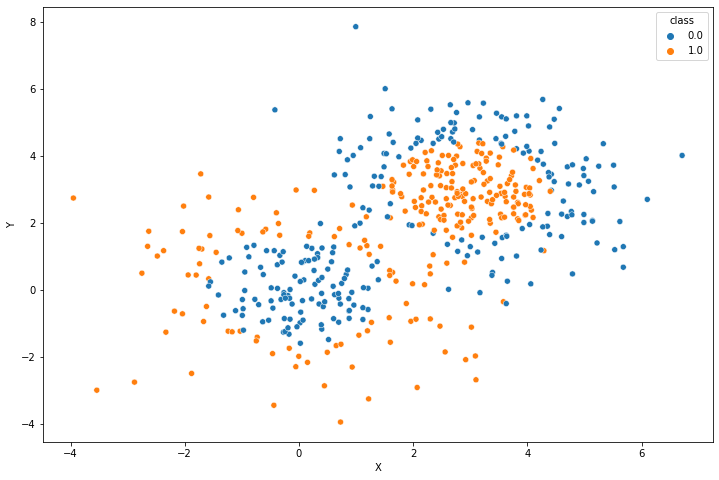

In [80]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**–ó–∞–¥–∞–Ω–∏–µ 1.** –û–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–∞—Ä–∏—Å—É–π—Ç–µ —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç—å (–ø—Ä—è–º—É—é) –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ —Å –¥–∞–Ω–Ω—ã–º–∏. –ö–∞–∫ –ª–∏–Ω–µ–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å –∑–∞–¥–∞—á–µ–π? –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥ –∏—Å—Ö–æ–¥—è –∏–∑ –≥–µ–æ–º–µ—Ç—Ä–∏–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –ª–∏–Ω–∏–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è. –ö–∞–∫–æ–π accuracy –≤—ã–π–¥–µ—Ç –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ (–±–µ–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–∏)?

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

splitter = KFold(n_splits=5, shuffle=True, random_state=33)

X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')
### Your code is here
model = LogisticRegression()
# cv_result_pipe = cross_validate(model, X, y, scoring='accuracy',
#                                 cv=splitter, return_train_score=True)


# print(f"Accuracy –Ω–∞ —Ç—Ä–µ–π–Ω–µ: {np.mean(cv_result_pipe['train_score']).round(3)}")
# print(f"Accuracy –Ω–∞ —Ç–µ—Å—Ç–µ: {np.mean(cv_result_pipe['test_score']).round(3)}")

In [82]:
model.fit(X, y)
logreg_preds = model.predict(X)
accuracy_score(y, logreg_preds)

0.424

In [83]:
h = .02

In [84]:
    # –†–∞—Å—á–µ—Ç –ø—Ä–µ–¥–µ–ª–æ–≤ –≥—Ä–∞—Ñ–∏–∫–∞
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # –ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

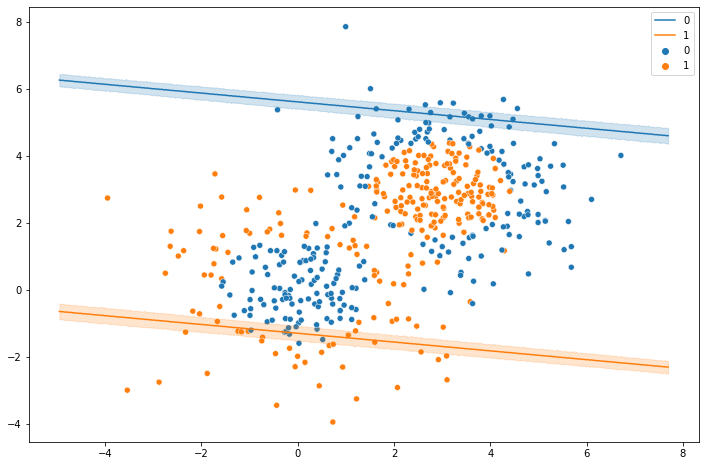

In [85]:
sns.scatterplot(X[:,0], X[:,1], data=X, hue=y);
sns.lineplot(x=xx.ravel(), y=yy.ravel(), hue=Z.ravel(), color='#FF5533');


In [90]:
model.coef_[0],  model.intercept_

(array([-0.00316169, -0.01204832]), array([0.0284847]))

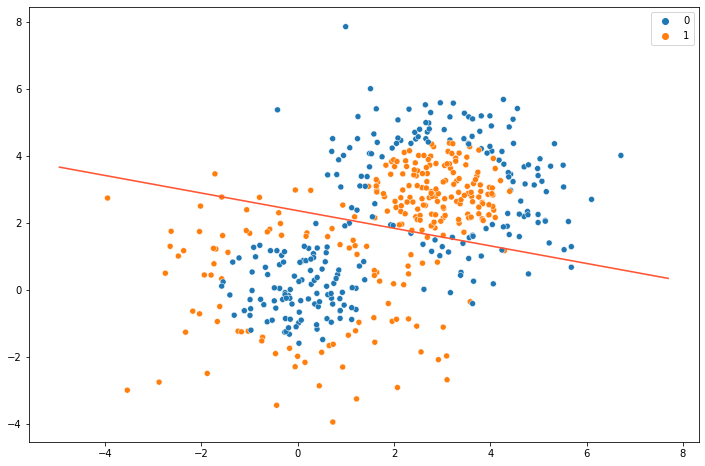

In [95]:
betas = model.coef_[0]
bias = model.intercept_
sns.scatterplot(X[:,0], X[:,1], data=X, hue=y);
sns.lineplot(x=xx.ravel(), y=(- betas[0] * xx.ravel() - bias) / betas[1] , color='#FF5533');

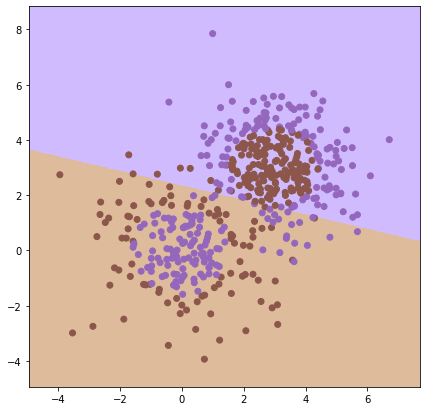

In [50]:
#sns.scatterplot(X[:,0], X[:,1], data=X, hue=y);
cmap = ListedColormap(sns.color_palette(as_cmap=True)[4:6])
cmap_light = ListedColormap(sns.color_palette("pastel", as_cmap=True)[4:6])

    # –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
Z = np.array(Z).reshape(xx.shape);
plt.figure(figsize=(7,7));
plt.pcolormesh(xx, yy, Z, cmap=cmap_light);
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

**–ó–∞–¥–∞–Ω–∏–µ 2.** –†–∞–∑–¥–µ–ª–∏—Ç–µ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –∏ –æ–±—É—á–∏—Ç–µ 6 –º–æ–¥–µ–ª–µ–π kNN —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º —á–∏—Å–ª–æ–º —Å–æ—Å–µ–¥–µ–π –∏–∑ `all_k`, —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤ —Å–ø–∏—Å–æ–∫. \
–í—ã–≤–µ–¥–∏—Ç–µ accuracy –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏. –ö–∞–∫–æ–≤–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è accuracy?

In [51]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

all_k = [1, 3, 10, 30, 40, 60]
all_clfs = []
### Your code is here
for K in all_k:

    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X_train, y_train)
    all_clfs.append(knn)
    preds_train = knn.predict(X_train)
    preds_test = knn.predict(X_test)
    print(K, accuracy_score(y_train, preds_train), accuracy_score(y_test, preds_test))
    


1 1.0 0.89
3 0.9475 0.87
10 0.915 0.85
30 0.8525 0.74
40 0.8 0.75
60 0.6925 0.73


**–ó–∞–¥–∞–Ω–∏–µ 3.** (–±–æ–Ω—É—Å–Ω–æ–µ) –°–∫–∞—á–∞–π—Ç–µ –±–∏–±–ª–∏–æ—Ç–∫—É [mlxtend](http://rasbt.github.io/mlxtend/#examples) –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π. 
–í –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å [–ø—Ä–∏–º–µ—Ä–∞–º–∏](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. \
–ü–æ—Å—Ç—Ä–æ–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è —à–µ—Å—Ç–∏ –æ–±—É—á–µ–Ω–Ω—ã—Ö –Ω–∞–º–∏ kNN.

1. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã `gridspec.GridSpec()` –∏ `itertools.product()` –¥–ª—è –Ω–∞—à–µ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤. 
2. –£–¥–æ–±–Ω–æ –ø–µ—Ä–µ–¥ –≤–∏–∑—É–ª–∏–∑–∞—Ü–∏–µ–π —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –æ–±—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤ —Å–ø–∏—Å–æ–∫ `all_clfs`.
3. –ü—Ä–æ—è–≤–∏—Ç–µ —Ç–µ—Ä–ø–µ–Ω–∏–µ! –û—Ç—Ä–∏—Å–æ–≤–∫–∞ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –º–æ–∂–µ—Ç –∑–∞–Ω–∏–º–∞—Ç—å –ø–∞—Ä—É –º–∏–Ω—É—Ç.

In [54]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

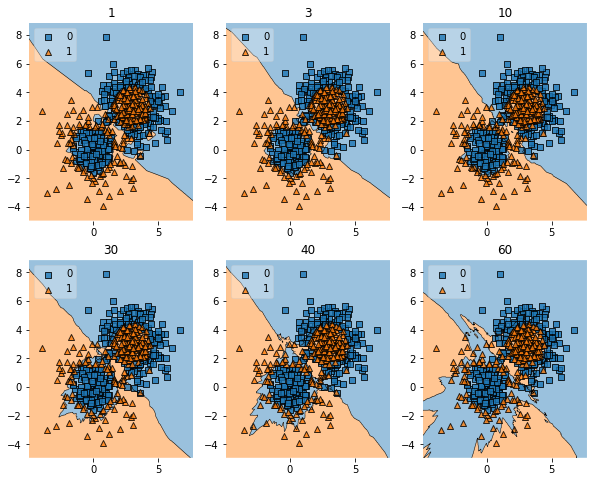

In [55]:
### Your code is here
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

#labels = ['Logistic Regression', 'K Neighbors Classifier']
for clf, lab, grd in zip(all_clfs,
                         all_k,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()



1. –ö–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —Ä–µ—à–∞—é—â–∞—è –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å —Å —Ä–æ—Å—Ç–æ–º —á–∏—Å–ª–∞ —Å–æ—Å–µ–¥–µ–π?
2. –ö–∞–∫–æ–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –≥–µ–æ–º–µ—Ç—Ä–∏–∏ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π? –ü–æ—è—Å–Ω–∏—Ç–µ —Å–≤–æ–π –æ—Ç–≤–µ—Ç, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏.
3. –õ—É—á—à–µ –ª–∏ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è kNN –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π?

**–ó–∞–¥–∞–Ω–∏–µ 4.** –°–∫–∞—á–∞–π—Ç–µ —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –¥–∞—Ç–∞—Å–µ—Ç [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). –û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä kNN –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏ –Ω–µ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å—Ä–µ–¥–∏ $k \in [1, 5, 10]$. –ó–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. \
–ü–æ—á–µ–º—É –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ–º–æ–≥–∞–µ—Ç —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ?

In [56]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

Trip_Distance  Customer_Since_Months  Life_Style_Index  Customer_Rating  \
0           6.77                    1.0           2.42769          3.90500   
1          29.47                   10.0           2.78245          3.45000   
2          41.58                   10.0           2.79805          3.50125   
3          61.56                   10.0           2.79805          3.45375   
4          54.95                   10.0           3.03453          3.40250   

   Cancellation_Last_1Month  Var1  Var2  Var3  Surge_Pricing_Type  \
0                         0  40.0    46    60                   2   
1                         0  38.0    56    78                   2   
2                         2  61.0    56    77                   2   
3                         0  61.0    52    74                   3   
4                         4  51.0    49   102                   2   

   Type_of_Cab_B  ...  Destination_Type_F  Destination_Type_G  \
0              1  ...                   0                   0   
1              1  ...                   0                   0   
2              1  ...                   0                   0   
3              0  ...                   0                   0   
4              0  ...                   0                   0   

   Destination_Type_H  Destination_Type_I  Destination_Type_J  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Destination_Type_K  Destination_Type_L  Destination_Type_M  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Destination_Type_N  Gender_Male  
0                   0            0  
1                   0            1  
2                   0            1  
3                   0            1  
4                   0            1  

[5 rows x 29 columns]

In [57]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [58]:
### Your code is here

all_k = [1, 5, 10]

### Your code is here
for K in all_k:

    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X_train, y_train)
    preds_test = knn.predict(X_test)
    print(K,  accuracy_score(y_test, preds_test))
    




1 0.43819542019519236
5 0.44317016671097104
10 0.4703603843086621


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for K in all_k:    
    pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=K))])
    pipe.fit(X_train, y_train)
    preds_test = pipe.predict(X_test)
    print(K,  accuracy_score(y_test, preds_test))


1 0.5648805681084571
5 0.6303877264269168
10 0.6607678578209851


**–ó–∞–¥–∞–Ω–∏–µ 5.** –û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä kNN –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç—Ä–∏–∫–∏ –ú–∏–Ω–∫–æ–≤—Å–∫–æ–≥–æ. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

–ó–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `p` –≤–æ–∑—å–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º –µ–¥–∏–Ω–∏—Ü–µ. –ó–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–∞–¥–∞–Ω–∏–µ–º, –≥–¥–µ `p = 2`.

In [60]:
### Your code is here

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, p=1 ))])
pipe.fit(X_train, y_train)
preds_test = pipe.predict(X_test)
print(accuracy_score(y_test, preds_test))



0.6611476094634109


**–ó–∞–¥–∞–Ω–∏–µ 6.** –°–∫–∞—á–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), –≤ –∫–æ—Ç–æ—Ä–æ–º –º—ã –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Å—Ä–µ–¥–Ω—é—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `['longitude', 'latitude']`, –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –Ω–∏—Ö —Å –ø–æ–º–æ—â—å—é scatterplot. \
–ü–æ –∫–∞–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–µ –Ω–∞—à kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –ø–æ–¥–±–∏—Ä–∞–µ—Ç —Å–æ—Å–µ–¥–µ–π?

1. –û–±—É—á–∏—Ç–µ –æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –∑–∞–º–µ—Ä—å—Ç–µ RMSE –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö.
2. –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã $k \in [1, 2, ..., 9]$. 
3. –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä —Å –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–º —è–¥—Ä–æ–º, –≤–∑—è–≤ –ø–∞—Ä–∞–º–µ—Ç—Ä k –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –ø—É–Ω–∫—Ç–∞ –∏ –ø–æ–¥–æ–±—Ä–∞–≤ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞ —Å—Ä–µ–¥–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã—Ö $h \in np.arange(0.02, 0.1, 0.01)$.

–ö–∞–∫ —à–∏—Ä–∏–Ω–∞ –æ–∫–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Å–∞ –ø—Ä–∏ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–∏ –æ—Ç–≤–µ—Ç–∞ –ø–æ —Å–æ—Å–µ–¥—è–º? 

In [61]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

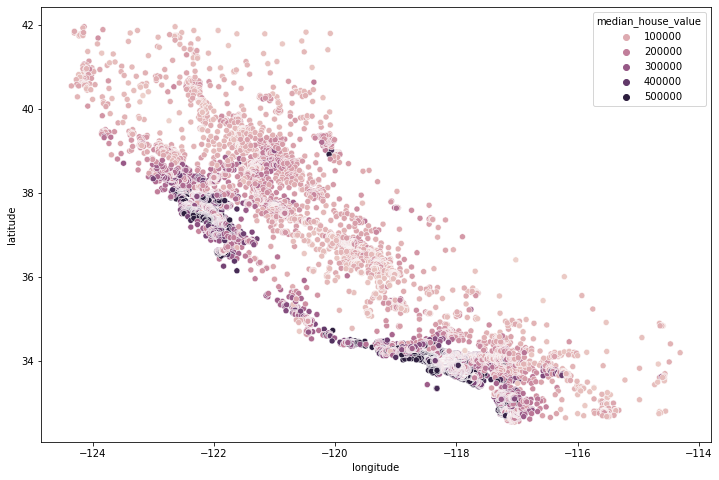

In [62]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [63]:
### Your code is here
from sklearn.linear_model import LinearRegression
splitter = KFold(n_splits=5, shuffle=True, random_state=33)

linear = LinearRegression()

linear_cv = cross_validate(linear, X_train, y_train, 
                           cv=splitter, scoring='neg_mean_squared_error',
                           return_train_score=True)

print(f"–°—Ä–µ–¥–Ω–µ–µ MSE –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ: {-np.mean(linear_cv['train_score']).round(3)}")
print(f"–°—Ä–µ–¥–Ω–µ–µ MSE –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–µ: {-np.mean(linear_cv['test_score']).round(3)}")

–°—Ä–µ–¥–Ω–µ–µ MSE –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ: 10190244401.805
–°—Ä–µ–¥–Ω–µ–µ MSE –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–µ: 10193599535.64


In [64]:
from sklearn.metrics import mean_squared_error
all_k = [i for i in range(1,10)]
for K in all_k:    
    pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=K))])
    pipe.fit(X_train, y_train)
    preds_test = pipe.predict(X_test)
    print(K,  mean_squared_error(y_test, preds_test))

1 4073025196.4011626
2 4059498579.5855136
3 4772073629.246124
4 5503457167.475775
5 5888256002.215601
6 6343521880.514535
7 6685787295.049176
8 7009007345.490552
9 7402653560.757995


In [65]:
from sklearn.neighbors import KNeighborsRegressor
h_range= ùëõùëù.ùëéùëüùëéùëõùëîùëí(0.02,0.1,0.01)
mse = {}
for h in h_range:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn = KNeighborsRegressor(n_neighbors=2, weights=kernel)
    knn.fit(X_train, y_train)
    
    preds_test = knn.predict(X_test)
    score = mean_squared_error(y_test, preds_test)
    mse[h] = score

print(mse)
    

{0.02: 3047638358.339993, 0.03: 3032406921.7628317, 0.039999999999999994: 3023251650.3027353, 0.049999999999999996: 3017903842.8589454, 0.06: 3014781298.5727463, 0.06999999999999999: 3012884385.5726194, 0.07999999999999999: 3011638890.823486, 0.09: 3010745650.1774664}


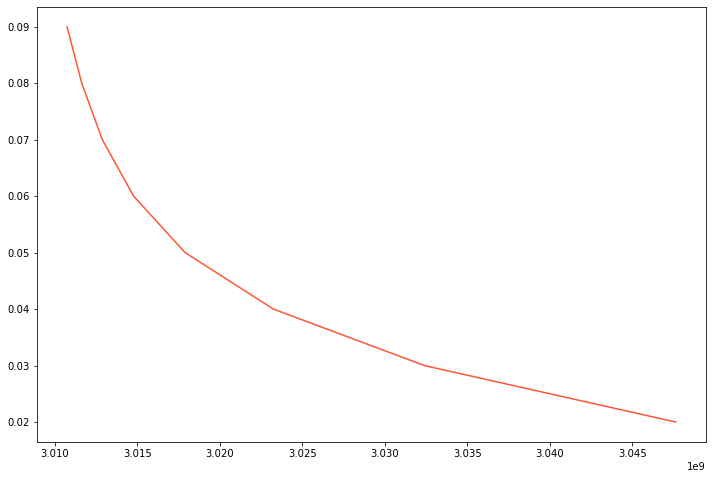

In [66]:
sns.lineplot(x=mse.values(), y=mse.keys(), color='#FF5533');